# #2 Notebook | Student Knowldege Level Prediction
----
## This notebook serves the purpose of a tutorial for beginners in EDA and Machine Learning Modeling.


![student picture](https://img.freepik.com/free-vector/boy-studying-with-book_113065-238.jpg?size=626&ext=jpg)

## Assesment of Student's Knowledge Level

You can choose from a variety of methods to assess your students’ prior knowledge and skills.  Some methods (e.g., portfolios, pre-tests, auditions) are direct measures of students’ capabilities entering a course or program. Other methods (e.g., students’ self-reports, inventories of prior courses or experiences) are indirect measures.

*Here we have a data that shows Student's Knowldege based on **Perormance** ranked as:-*

1. Very Low
2. Low
3. Middle
4. High

### My belief: -
> It is very wrong to judge a student's knowledge level based on his/her performance because knowledge can never be summarized on a sheet of paper. Many of the teachers, parents and gaurdians judge the students or kids on there quantitative performance in the school. Please Stop this!!
----
----

# In this EDA and Modeling Notebook

- Understanding our data and its features.
- Making a note of Questions that can be answered using this data.
- Cleaning our Data
- Vizualizing our data to find answers in the data.
- Using little statistics to explore and analyze our data.
- Noting all the observations from the data.
- Preparing Data for machine learning model (Pre-Processing)
- Understanding which Machine Learning model will be suitable to use with our data to make predictions.
- Setting up our models.
- Testing our models.
- Reconfiguring the model.
- Testing again.
- Making a few predictions.
****
***
<img src="https://media1.tenor.com/images/a8794889e70df7b3c5b8149807c6340d/tenor.gif?itemid=11880008" height=450>

# Importing Libraries:-

1. **Pandas**:-  
    
    Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python     programming language [Pandas Documentation](https://pandas.pydata.org/docs/)
***

2. **Matplotlib**: - 
    
    Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides     an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter.
    [Matplotlib Documentation](https://matplotlib.org/contents.html)


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #data visualization
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

'''
Bunch of statements by Kaggle to get path to your data. 
Don't worry if you don't understand them they are not of much concern right now.
'''

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/predict-students-knowledge-level/Data_User_Modeling_Dataset - Test_Data.csv
/kaggle/input/predict-students-knowledge-level/Data_User_Modeling_Dataset - Information.csv
/kaggle/input/predict-students-knowledge-level/Data_User_Modeling_Dataset - Training_Data.csv


# ☝️
The above output have three lines which are the paths to our dataset. There are 3 paths aas our data set contain three files.
1. Test_Data.csv
2. Information.csv
3. Training_Data.csv

------------------------------------------------
# 🔍 Understanding the DATA.
----------------------------------------------

We will start by loading our data in pandas' dataframes and understanding them one by one.

In [2]:
# Loading Data in daaframe

info_df = pd.read_csv('/kaggle/input/predict-students-knowledge-level/Data_User_Modeling_Dataset - Information.csv')
test_df = pd.read_csv('/kaggle/input/predict-students-knowledge-level/Data_User_Modeling_Dataset - Test_Data.csv')
train_df = pd.read_csv('/kaggle/input/predict-students-knowledge-level/Data_User_Modeling_Dataset - Training_Data.csv')

### The first thing to notice from these three files is there need.


1. Information.csv: - This file is provided to us for some kind of information regarding our data and will not contribute to any data related operation othe than providing knowledge about data in two other files.

In [3]:
# Information.csv
info_df.head() #to print the first 5 rows of the dataframe

,Data Set Characteristics: Multivariate,Unnamed: 1,Attribute Information:
0,Number of Instances: 403,NaN,STG (The degree of study time for goal object ...
1,Area: Education,NaN,SCG (The degree of repetition number of user f...
2,Attribute Characteristics: Real,NaN,STR (The degree of study time of user for rela...
3,Number of Attributes: 5,NaN,LPR (The exam performance of user for related ...
4,Associated Tasks: Classification,NaN,PEG (The exam performance of user for goal obj...


# ☝️
It is clear now that this dataframe or file contain information regarding the dataset and the acronyms in our dataset. Lets try to print these more effectively.

In [4]:
'''
To remove the column width restriction by pandas,
An esy solution is to see the column by converting it to a list
'''
list(info_df['Attribute Information:']) 

['STG (The degree of study time for goal object materails),',
 'SCG (The degree of repetition number of user for goal object materails)',
 'STR (The degree of study time of user for related objects with goal object)',
 'LPR (The exam performance of user for related objects with goal object)',
 'PEG (The exam performance of user for goal objects)',
 'UNS (The knowledge level of user)',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

I guess the definitions of acronyms are pretty self-undestandable. So, lets proceed now to our second and third dataset.

-----------

2. **Training_Data.csv**
3. **Test_Data.csv**

We are being provided with two separate data files containg data for specific purpose of Training and Testing respectively.
Lets see what these contain inside them.

In [5]:
train_df.head()

,STG,SCG,STR,LPR,PEG,UNS,Unnamed: 6,Unnamed: 7,Attribute Information:
0,0.00,0.00,0.00,0.00,0.00,very_low,NaN,NaN,STG (The degree of study time for goal object ...
1,0.08,0.08,0.10,0.24,0.90,High,NaN,NaN,SCG (The degree of repetition number of user f...
2,0.06,0.06,0.05,0.25,0.33,Low,NaN,NaN,STR (The degree of study time of user for rela...
3,0.10,0.10,0.15,0.65,0.30,Middle,NaN,NaN,LPR (The exam performance of user for related ...
4,0.08,0.08,0.08,0.98,0.24,Low,NaN,NaN,PEG (The exam performance of user for goal obj...


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   STG                     258 non-null    float64
 1   SCG                     258 non-null    float64
 2   STR                     258 non-null    float64
 3   LPR                     258 non-null    float64
 4   PEG                     258 non-null    float64
 5    UNS                    258 non-null    object 
 6   Unnamed: 6              0 non-null      float64
 7   Unnamed: 7              0 non-null      float64
 8   Attribute Information:  6 non-null      object 
dtypes: float64(7), object(2)
memory usage: 18.3+ KB


# ☝️
The above information about our training data shows high inconsistency in it.
- There are columns with no values in it.
- There are columns which are named wrong way ('< space >UNS')
- Column, 'Attribute Information' holds no relevance placed in this data frame.

### Other important information.
- In the training Data we have information about 258 students.
- All the columns except UNS hold float value datatype data.
- UNS holds either string or any other object data.

In [7]:
train_df[' UNS']

0      very_low
1          High
2           Low
3        Middle
4           Low
         ...   
253        High
254      Middle
255        High
256      Middle
257        High
Name:  UNS, Length: 258, dtype: object

so as conveyed in Information dataframe UNS contains level on which every student is ranked.

In [8]:
test_df.head()

,STG,SCG,STR,LPR,PEG,UNS,Unnamed: 6,Unnamed: 7,Attribute Information:
0,0.00,0.10,0.50,0.26,0.05,Very Low,NaN,NaN,STG (The degree of study time for goal object ...
1,0.05,0.05,0.55,0.60,0.14,Low,NaN,NaN,SCG (The degree of repetition number of user f...
2,0.08,0.18,0.63,0.60,0.85,High,NaN,NaN,STR (The degree of study time of user for rela...
3,0.20,0.20,0.68,0.67,0.85,High,NaN,NaN,LPR (The exam performance of user for related ...
4,0.22,0.22,0.90,0.30,0.90,High,NaN,NaN,PEG (The exam performance of user for goal obj...


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   STG                     145 non-null    float64
 1   SCG                     145 non-null    float64
 2   STR                     145 non-null    float64
 3   LPR                     145 non-null    float64
 4   PEG                     145 non-null    float64
 5    UNS                    145 non-null    object 
 6   Unnamed: 6              0 non-null      float64
 7   Unnamed: 7              0 non-null      float64
 8   Attribute Information:  6 non-null      object 
dtypes: float64(7), object(2)
memory usage: 10.3+ KB


# ☝️
The above information about our testing data shows high inconsistency similar to our Training data.
- There are columns with no values in it.
- There are columns which are named wrong way ('< space >UNS')
- Column, 'Attribute Information' holds no relevance placed in this data frame.

### Other important Information
- There are total of 145 students' information for aor testing basis.
- The other information is same as our Training information that is good to work with.

![](https://media1.tenor.com/images/b6518d732a9cd1857f7c1dde76dc907a/tenor.gif?itemid=11637169)

We have now understood what our data is and how it is provided to us. So, lets move to our next step.

---
# Discussion about what can we do and what should be done with our DATA.

1. First thing first we need to do a bit of cleaning in our provided data to proceed with any kind of analysis or anything.
2. We got a feature(Column) in our data ' UNS' whose name is to be fixed.
3. UNS, is a [categorical Data](https://study.com/academy/lesson/categorical-data-definition-analysis-examples.html) which cannot be directly used with our machine learning models.

*Why it can not be used directly?*
```
I will be answering the question in a very simple way so that everyone can unerstand. UNS contains strings which are not defined in mathematics or in other words are not understandable by computers so we cannot feed our models these kind of data.
```

*What should be done to fix this?*

```The computers understand only numbers and hence we will convert our categorical data to numeric data by using an approach called ``` [Label Encoding](https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/).

----

# EDA and Modeling objectives: -

After understanding basic tasks to carry over data we need to describe and understand big picture.
1. Analyse Data
    - Try finding out relation ship among various features of Data.
    - Knowing what is your target variable in this case it is UNS (Level of Knowledge of a Studen).
    - Try finding out relationship of target variable with other features.
    - Note down very specific questions that can or should be answered by this type of data.
        1. How UNS/Level of Knowledge depends upon PEG (The exam performance of user for goal objects)
        2. Is there any relationship between PEG (The exam performance of user for goal objects) and SCG (The degree of repetition number of user for goal object materails) and much more.
        3. Id it reliable to predict UNS based upon the other features in the data.
    - The most important part of EDA is to visualize your data to support you findings.
    
  ** The above are some of the basic questions that should be raised by your mind after understanding this data.
     The main motive behind telling you all this is to make you understand the way you should start questioning your data.** 

2. Modeling Analysis:
   
       If you are a little bit familiar with types of Machine Learning problems then you must be having various models in your mind to use with this data but for beginners let me tell you about this topic in very simple words.
       
       When you see this data and understand that UNS/Level of Knowldege is our target variable you know that the thing we need to do is to label a student or rank a student on the basis of him/her performance. This labeling or ranking can be considered as classification right? So, this problem or data can only be solved using Machine Learning Classifiers. 
       
       What I want to tell you is this that to label or classify something on the basis of its feature we use specific Machine learning models. If you go on Google and search for "Types of problems Machine Learning solve."
       We will discuss fiurther about it Later.
       
       

# Cleaning and Fixing out Data


In [10]:
# Let us start with training data

train_df.columns

Index(['STG', 'SCG', 'STR', 'LPR', 'PEG', ' UNS', 'Unnamed: 6', 'Unnamed: 7',
       'Attribute Information:'],
      dtype='object')

We need to remove the last 3 columns and rename 6th column.

In [11]:
'''
* drop() function drops all the columns passed into it, 
* axis=1 is for telling drop() to delete values in the column not in the row, 
* inplace=True is for telling drop to save all the changes to oue dataframe.
'''
train_df.drop(['Unnamed: 6', 'Unnamed: 7','Attribute Information:'], axis=1, inplace=True)

In [12]:
# Now lets fix the name of 6th column.
# Its a good practice to keep column names the same as provided in the data set but here for better understanding we will change UNS to Knowldege Level
train_df.rename(columns = {' UNS':'Knowledge Level'}, inplace = True) 

In [13]:
# And the magic has been done.
train_df.head()

,STG,SCG,STR,LPR,PEG,Knowledge Level
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low


Now we need to repeat the 2 operations above for our testing dataset. Here there are just 2 operations and 2 dataframes what if I give you 10 datasets with 5 operation to be repeated you need to do it for 50 tiime. So our fundamentals of programming says that,

#### We Programmers are Lazy as Hell.

So we will try to design a function that can accept a data frame and do all the work.

In [14]:
def fix_data(temp_df):
    #remenber you can always optimize you work by defining a function or using a loop.
    
    temp_df.drop(['Unnamed: 6', 'Unnamed: 7','Attribute Information:'], axis=1, inplace=True)
    temp_df.rename(columns = {' UNS':'Knowledge Level'}, inplace = True)
    return temp_df

In [15]:
test_df = fix_data(test_df)

In [16]:
# And like this evrything is done.
test_df.head()

,STG,SCG,STR,LPR,PEG,Knowledge Level
0,0.00,0.10,0.50,0.26,0.05,Very Low
1,0.05,0.05,0.55,0.60,0.14,Low
2,0.08,0.18,0.63,0.60,0.85,High
3,0.20,0.20,0.68,0.67,0.85,High
4,0.22,0.22,0.90,0.30,0.90,High


Now one part of our task has been done that is fixing now all we left with is Cleaning.

---
## Cleaning the Data
![cleaning](https://i.pinimg.com/originals/41/5b/fd/415bfd2c979b0f4c671a3a133e441785.gif)

For now we will focusing only on the basics of cleaning and outlier detection.
1. Checking Data for Null, NAN, or Invalid values.
2. Scanning Data For outliers.
3. Removing outliers on basis of visual observations.

In [17]:
# Checking data for nan values
'''
As above we need to do all operation twice for both of the data frames so we will design a function.
'''
def clean_my_data(df):
    if df.isnull().values.any(): # isnull().values.any() returns a boolean value depending upon the presence of null value anywhere in data
        print(df.isnull()) # returns dataframe filled with boolean values for presence of null
        df = df.dropna()
    else: print('Your data do not contain any missing values.')
    return df

In [18]:
train_df = clean_my_data(train_df)

Your data do not contain any missing values.


In [19]:
test_df = clean_my_data(test_df)

Your data do not contain any missing values.


### Outlier Detection.

In statistics, outliers are data points that don’t belong to a certain population. It is an abnormal observation that lies far away from other values. An outlier is an observation that diverges from otherwise well-structured data.

<img src="https://support.minitab.com/en-us/minitab/18/outlier_scatterplot.png" height=250 width=250>

There are various mathematical and visual methods for eliminating outliers in data but we will be using some of them which are simple and basic.[Outlier Detection Article](https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623)

We will be using `Seaborn` for visualizing purpose as it is an extention to matplotlib with various awesome features.

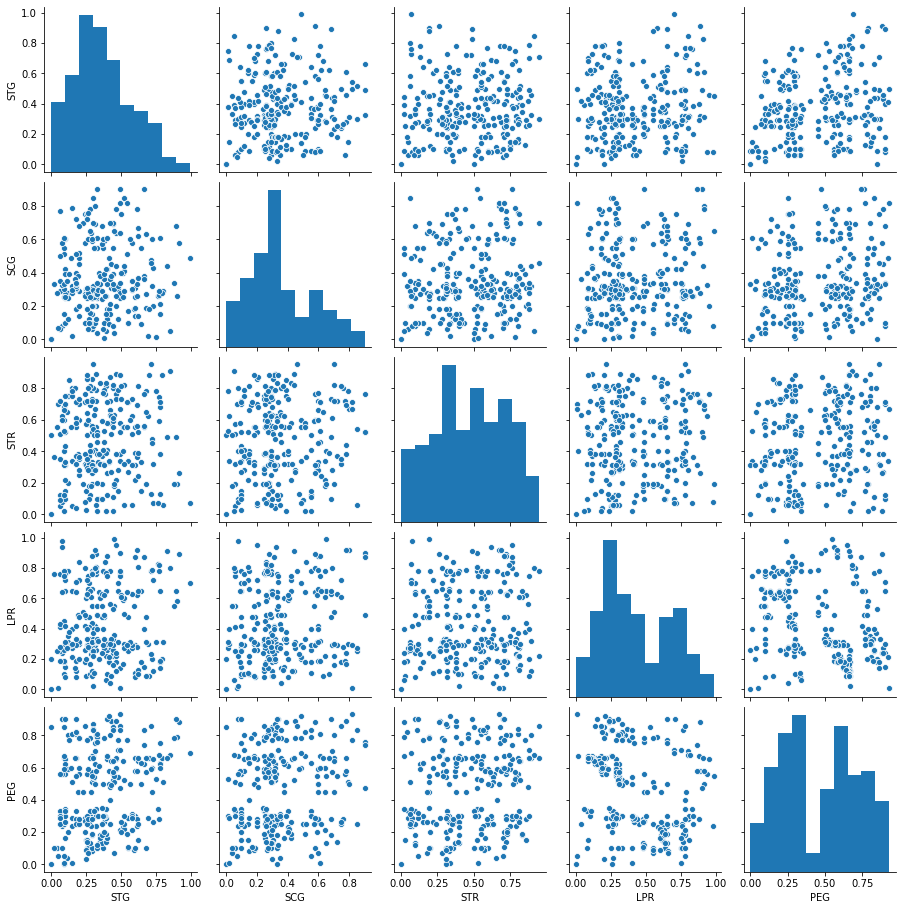

In [20]:
import seaborn as sns
'''
* Here pairplot does is it takes all the features of the dataframe and plot them pair wise as can be seen below.
* train_df.select_dtypes(include=[np.number]).columns this returns only those columns which contain numeric data.
* passing the above columns in train_df we can easily return dataframe with only numeric data so that we can see the distribution of data 
a swell as can observe the outliers presence.
'''
sns.pairplot(train_df[train_df.select_dtypes(include=[np.number]).columns])

# ☝️
The above plots shows no siginificance presence of outliers. Although we can move on with various other methods to detect and eliminate out liers. But for now I will not be covering those topics as purpose of this notebook is not to teach everything but to teach you the very basics of ML and DA.

### Also We can use Boxplots to visualize and identify Outliers.

## Box Plots
****

<img src="https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png" height=300 width=600>


*A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile(Q1), median, third quartile (Q3), and “maximum”). 
It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.*

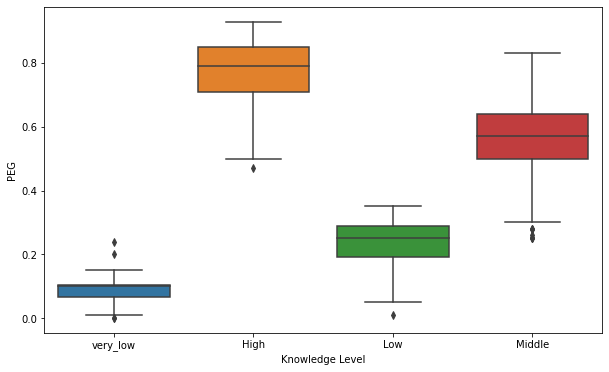

In [21]:
f,ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data = train_df, x='Knowledge Level', y='PEG', ax=ax)

# Observations: -
- Here also we can see the presence of outliers in the feature PEG.
- We will next try to identify the novely of these outlier i.e. are these outliers only due for PEG or we can see the same patterns in other column too.

Well we can observe that ther exist PEG score less than 0 which can be an issue so we will eliminate lets see what happens to the dataset 

In [22]:
train_df.drop(train_df[train_df['PEG'] < 0 ].index, axis=1, inplace=True)

> Next I will be showing you to create subplots using a loop and we will be plcing these boxplots in the grid of 6x6.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ee1e084d0>,
      dtype=object)

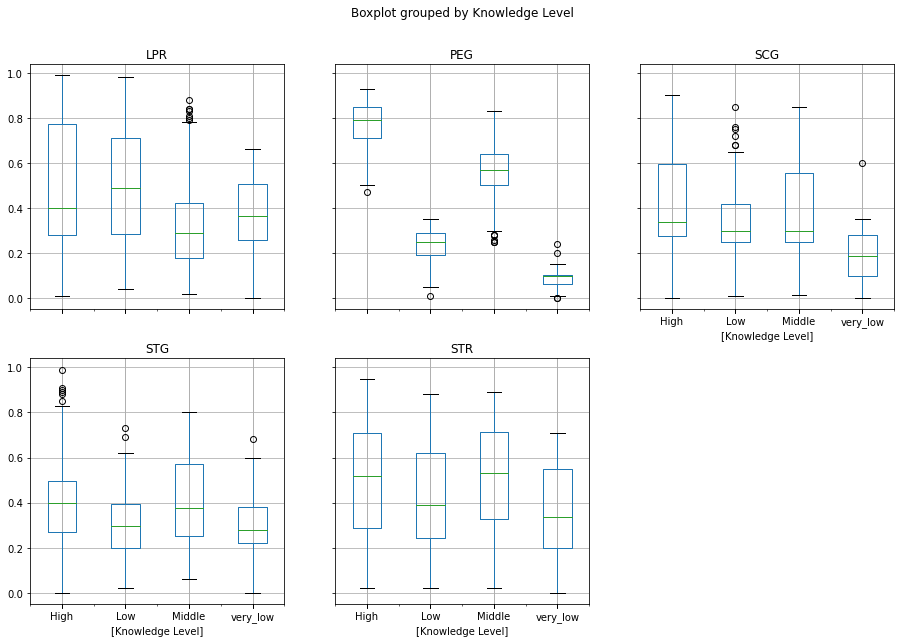

In [23]:
#fig = plt.figure(figsize=)
#axes = fig.subplots(2, 3)
train_df.boxplot(layout=(2,3), by='Knowledge Level', figsize=[15,10])


# Exploratory Data Analysis

We will try to answer question and determine realtionships inside data.

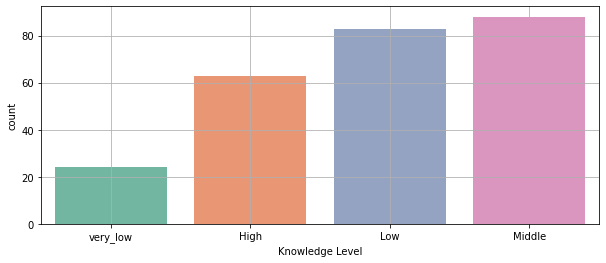

In [24]:
f,ax = plt.subplots(figsize=(10, 4))
sns.countplot(x = 'Knowledge Level', data = train_df, palette="Set2", ax=ax)
plt.grid(True)

# Observations: -
The frequency count for our Knowledge level shows:-
- Maximum number of sutdents have Middle Level of Knowledge followed by Low and then High and at last are the very_low.
- Count shows very less difference in the number if students having Middle and Low Level Knowledge.
- While a huge difference can be seen between Low and very Low level and same for Middle and High level Knowledge students.


In [25]:
'''
Pandas come with the best method to start an EDA. You can directly use pandas to analyze and describe your data
'''
train_df.describe()

,STG,SCG,STR,LPR,PEG
count,258.000000,258.000000,258.000000,258.000000,258.000000
mean,0.371147,0.355674,0.468004,0.432713,0.458539
std,0.210271,0.211962,0.245940,0.248108,0.255211
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240750,0.210000,0.291250,0.250000,0.250000
50%,0.327000,0.302500,0.490000,0.330000,0.500000
75%,0.495000,0.497500,0.690000,0.647500,0.660000
max,0.990000,0.900000,0.950000,0.990000,0.930000


# ☝️
From the above tabel 
# Observations:-
- The average performance degree of a student is 0.458
- Degree of performance ranges from 0 to 0.93 in data set.
- From Standard Deviation of all the features it is clear that distribution of data is not normal.

#### NextWe can do is, plot a Heat map of correlation.

Plotting a correlation map will tell us about the linear relation ship between the features in the dataset.

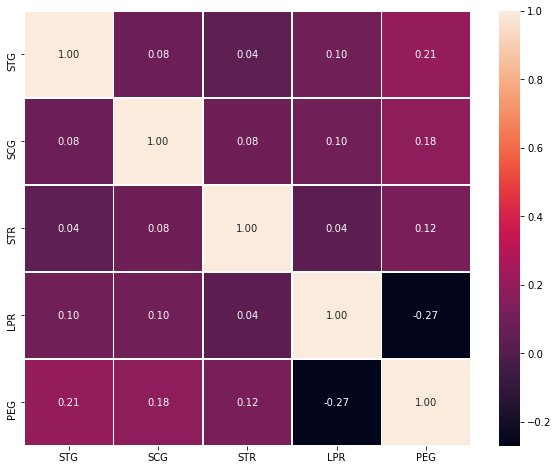

In [26]:
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(train_df.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)

# Observations: -
- There is no linear correlation between any of the features.

### So far we have observed no linear distribution we have been able to see a glimpse of data distribution in separated groups.


Lets try to plot data in a way that we can observe groups if they exxist in distribution.

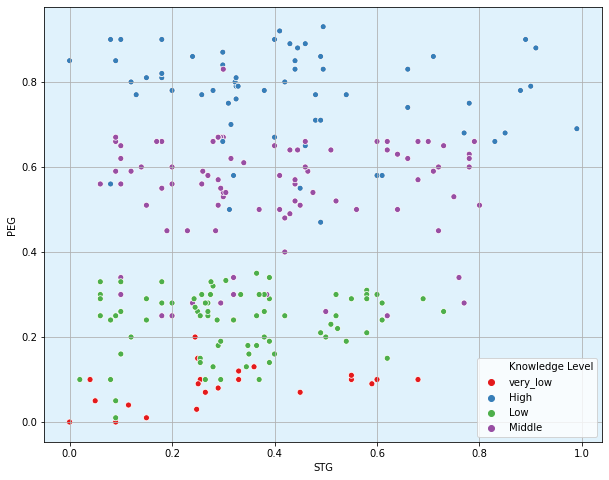

In [27]:
f,ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(train_df['STG'], train_df['PEG'], hue=train_df['Knowledge Level'], ax=ax, palette="Set1")
ax.set_facecolor('#e0f2fc')
plt.grid(True)

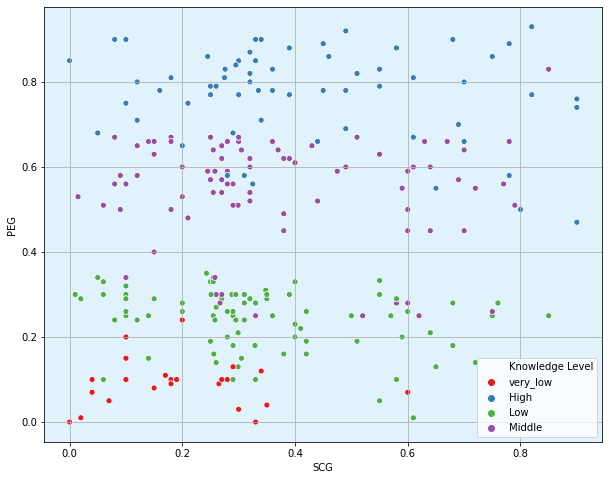

In [28]:
f,ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(train_df['SCG'], train_df['PEG'], hue=train_df['Knowledge Level'], ax=ax, palette="Set1")
ax.set_facecolor('#e0f2fc')
plt.grid(True)

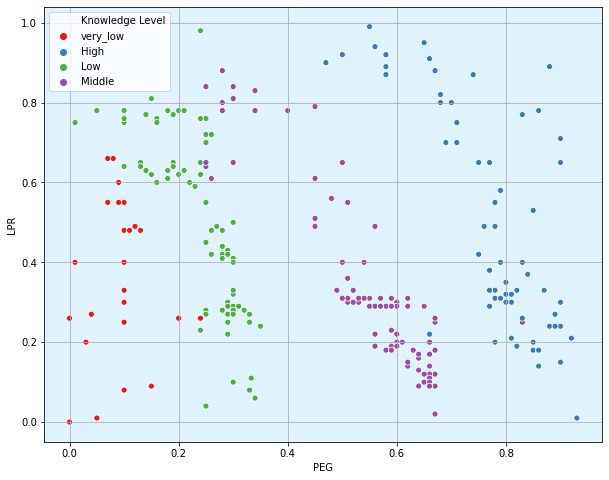

In [29]:
f,ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(train_df['PEG'], train_df['LPR'], hue=train_df['Knowledge Level'], ax=ax, palette="Set1")
ax.set_facecolor('#e0f2fc')
plt.grid(True)

# Observations 
- we can clearly see the distribution of data into groups but groups are not very distinguished with each other so lets start the modelling process but first we need to do an important stuff.

# Label Encoding.


### What the heck is Label Encoding?
As explained before our 'Knowledge Level' column is a string object and cannot be understood by the computer so we need to encode our string data to numeric form.

EXAMPLE: 
<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fpic.fizzy.cc%2Fimg%2Flabel_encoding.png&f=1&nofb=1" >

Similarly we will be encoding vaues in Knowledge Level feature using Label Encoder from sklearn.preprocessing

In [30]:
train_df['Knowledge Level'].unique()

array(['very_low', 'High', 'Low', 'Middle'], dtype=object)

In [31]:
Knwoledge_levels = train_df['Knowledge Level'].unique()

In [32]:
df = train_df
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['Knowledge Level']= label_encoder.fit_transform(df['Knowledge Level']) 
test_df['Knowledge Level'] = label_encoder.fit_transform(test_df['Knowledge Level'])
df


,STG,SCG,STR,LPR,PEG,Knowledge Level
0,0.00,0.00,0.00,0.00,0.00,3
1,0.08,0.08,0.10,0.24,0.90,0
2,0.06,0.06,0.05,0.25,0.33,1
3,0.10,0.10,0.15,0.65,0.30,2
4,0.08,0.08,0.08,0.98,0.24,1
...,...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58,0
254,0.78,0.61,0.71,0.19,0.60,2
255,0.54,0.82,0.71,0.29,0.77,0
256,0.50,0.75,0.81,0.61,0.26,2


So now we have encoded our string values to numeric values.

In [33]:
print('Encoding Approach:')
for i,j in zip(Knwoledge_levels, df['Knowledge Level'].unique()):
    print('{}  ==>  {}'.format(i,j))

Encoding Approach:
very_low  ==>  3
High  ==>  0
Low  ==>  1
Middle  ==>  2


![](https://media1.giphy.com/media/xT9KVmZwJl7fnigeAg/giphy.gif)

## Limitation of label Encoding
---
Label encoding convert the data in machine readable form, but it assigns a unique number(starting from 0) to each class of data. This may lead to the generation of priority issue in training of data sets. A label with high value may be considered to have high priority than a label having lower value.

So we also need to **One-Hot encoding**.

*One-hot encoding* ensures that machine learning does not assume that higher numbers have a higher value. For example, the value '8' is bigger than the value '1', but that does not make '8' more important than '1'. The same is true for words. The value 'New York' is not more important than 'York'.

![](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fi.imgur.com%2FmtimFxh.png&f=1&nofb=1)

To learn more about One-Hot Encoding [Click Here](https://www.quora.com/What-is-one-hot-encoding-and-when-is-it-used-in-data-science?share=1)

Here I will not be showing you the HO-Encoding otherwise it will be a lot to digest in one bite. Tough I am giving a code which you can use by yourself to understand what is One-Hot Encoding.
```python
hot_encoded=pd.get_dummies(df, columns=['Knowledge Level'])
hot_encoded
```

# Modeling

So lets see what we have and what we know.
- During Analysis we noticed that there was an irregular data distrivution.
- Distribution of data was nither completely linear nor was completely clustered.
- Data is distributed in a way that it can divided into groups.

The model we can use can be either clustering or SVM. Well looking at the data we know making clusters will result in large errors so we will go with SVM(Support Vector Machine).

# Support Vector Machine.

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fi.stack.imgur.com%2F653iE.png&f=1&nofb=1" height=450 width=450>

In machine learning, support vector machines are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis.

Now before using our data we need to do a few things
- separate dependent and independent variables

Here we have two different files containing test and train data but most of the time we have a single data file containg the whole data and we need to crate two randomly separated datasets for training and testing purpose. 

So I will merge the databasets and will show you how we do create random test and train datasets using `sklearn library`.

In [34]:
df = df.append(test_df, ignore_index = True) #using append to add two datasets.

In [35]:
X = df.drop(['Knowledge Level'],axis=1) # assigning X all the independent variable
y = df['Knowledge Level'] #assigning y the target variable

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #using train_test_split() to randomly split dataset to train and test.

In [37]:
# In actual we will be using Support Vector Classifier thats why we create an object of SVC.
clf = SVC()
clf.fit(X_train, y_train) #fitting data in the model.

SVC()

### Let's see how good is our model.

In [38]:
clf.score(X_test, y_test)

0.9259259259259259

We have got an accuracy of about 94% for the first try which is a very good score for the first time run. Now to further incrase accuracy of the model we can tune the model using Hyperparameters. The list of Hyper parameters for SVM are:-
1. Regularization parameter(C)
2. kernel
3. gamma
4. coef0

these are few of the hyperparameters to change and tune the model. [Further Information](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

# Tunning the model.

by practise it is seen that most of the time increasing value of Regularization and decreasing value of gamma increases accuuracy.

In [39]:
clf_1 = SVC(C=50, gamma=1)

In [40]:
clf_1.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9259259259259259

No change noticed.

In [41]:
clf_2 = SVC(C=100, gamma=0.1)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9259259259259259

Again No change is notice. 
### So we can conclude that our model can work at 92+% accuracy.

> **NOTE** - You can also alter the accuracy of the model by shuffling and splitting test and train dataset.

# Summary:

- The data provided contain 5 independent features and 1 target variable.
- Classification of Students on the basis of these 5 features is very likely to be possible.
- Features do not hold any linear correlation with each other.
- Most of the students are likely to be ranked at Middle level knowledge students.
- The student count for students with highest knowledge level are second to last.

### If you liked and got benefited from this kernel make sure to upvote it.

![Thankyou](https://1.bp.blogspot.com/-h1ZVngco9Ho/Xeo-8eXRpPI/AAAAAAAAJhk/GB1R49vn2Ukhp24tRlkv084E0oYWY4weACLcBGAsYHQ/s400/Thank-You-GIF%2B%252817%2529.gif)